In [24]:
# ═══════════════════════════════════════════════════════════════════════════
# 📦 KÜTÜPHANELER VE MODERN TEMA KURULUMU
# ═══════════════════════════════════════════════════════════════════════════

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             roc_auc_score, roc_curve, precision_score, recall_score,
                             f1_score, auc, precision_recall_curve)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
import pickle
from matplotlib.patches import Rectangle, FancyBboxPatch
from matplotlib.gridspec import GridSpec

warnings.filterwarnings('ignore')

# ═══════════════════════════════════════════════════════════════════════════
# 🎨 PROFESYONEL RENK PALETİ VE TEMA AYARLARI
# ═══════════════════════════════════════════════════════════════════════════

# Modern ve Yumuşak Renk Paleti (Sunum için ideal)
COLORS = {
    'primary': '#667BC6',       # Soft Blue - Ana renk
    'secondary': '#DA7297',     # Soft Pink - İkincil renk
    'success': '#7ED7C1',       # Mint Green - Başarı
    'warning': '#FFB26B',       # Peach - Uyarı
    'danger': '#FF6B6B',        # Coral Red - Tehlike
    'info': '#A8DADC',          # Sky Blue - Bilgi
    'purple': '#B8A0D3',        # Lavender - Mor
    'teal': '#66C2C2',          # Teal - Turkuaz
    'gradient': ['#667BC6', '#DA7297', '#7ED7C1', '#FFB26B', '#B8A0D3'],
    'bg': '#F8F9FA',            # Açık gri arka plan
    'text': '#2C3E50'           # Koyu metin
}

# Matplotlib global ayarları
plt.style.use('default')
plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': '#FAFBFC',
    'axes.edgecolor': '#DEE2E6',
    'axes.labelcolor': '#2C3E50',
    'axes.labelweight': 'bold',
    'axes.titleweight': 'bold',
    'axes.titlesize': 14,
    'axes.labelsize': 11,
    'text.color': '#2C3E50',
    'xtick.color': '#6C757D',
    'ytick.color': '#6C757D',
    'grid.color': '#E9ECEF',
    'grid.alpha': 0.6,
    'grid.linewidth': 0.8,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans', 'Helvetica'],
    'font.size': 10,
    'legend.framealpha': 0.95,
    'legend.edgecolor': '#DEE2E6',
    'legend.fancybox': True,
    'legend.shadow': True
})

sns.set_palette(COLORS['gradient'])
sns.set_context("notebook", font_scale=1.1)

print("✨ Tema ve Kütüphaneler Hazır!")

✨ Tema ve Kütüphaneler Hazır!


In [25]:
# ═══════════════════════════════════════════════════════════════════════════
# 📂 VERİ YÜKLEME VE İLK İNCELEME
# ═══════════════════════════════════════════════════════════════════════════

try:
    df = pd.read_csv('depression_data.csv')

    # Modern banner
    print("╔═══════════════════════════════════════════════════════════════╗")
    print("║                   📊 VERİ SETİ YÜKLENDI                       ║")
    print("╠═══════════════════════════════════════════════════════════════╣")
    print(f"║  📌 Toplam Kayıt         : {df.shape[0]:>8,}                       ║")
    print(f"║  📌 Toplam Özellik       : {df.shape[1]:>8}                        ║")
    print(f"║  📌 Eksik Değer          : {df.isnull().sum().sum():>8}                        ║")
    print("╚═══════════════════════════════════════════════════════════════╝\n")

    # Veri ön görünümü
    print("🔍 İlk 5 Kayıt:")
    display(df.head())
except FileNotFoundError:
    print("❌ HATA: 'depression_data.csv' dosyası bulunamadı. Lütfen dosyayı yükleyin.")

╔═══════════════════════════════════════════════════════════════╗
║                   📊 VERİ SETİ YÜKLENDI                       ║
╠═══════════════════════════════════════════════════════════════╣
║  📌 Toplam Kayıt         :  413,768                       ║
║  📌 Toplam Özellik       :       16                        ║
║  📌 Eksik Değer          :        0                        ║
╚═══════════════════════════════════════════════════════════════╝

🔍 İlk 5 Kayıt:


,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [26]:
# ═══════════════════════════════════════════════════════════════════════════
# ⚙️ VERİ ÖN İŞLEME
# ═══════════════════════════════════════════════════════════════════════════

df_processed = df.copy()

# Binary dönüşüm
binary_cols = ['History of Mental Illness', 'History of Substance Abuse',
               'Family History of Depression', 'Chronic Medical Conditions']

print("🔄 Binary Dönüşüm (Yes/No → 1/0):\n")
for i, col in enumerate(binary_cols, 1):
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].map({'Yes': 1, 'No': 0})
        print(f"  ✓ [{i}/{len(binary_cols)}] {col}")

# Name sütununu kaldır
if 'Name' in df_processed.columns:
    df_processed = df_processed.drop('Name', axis=1)
    print("\n🗑️  İsim sütunu kaldırıldı")

# Değişken kategorileri
categorical_cols = df_processed.select_dtypes(include='object').columns.tolist()
numerical_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()
target_col = 'History of Mental Illness'

if target_col in numerical_cols:
    numerical_cols.remove(target_col)

print("\n✅ Ön işleme tamamlandı.")

🔄 Binary Dönüşüm (Yes/No → 1/0):

  ✓ [1/4] History of Mental Illness
  ✓ [2/4] History of Substance Abuse
  ✓ [3/4] Family History of Depression
  ✓ [4/4] Chronic Medical Conditions

🗑️  İsim sütunu kaldırıldı

✅ Ön işleme tamamlandı.


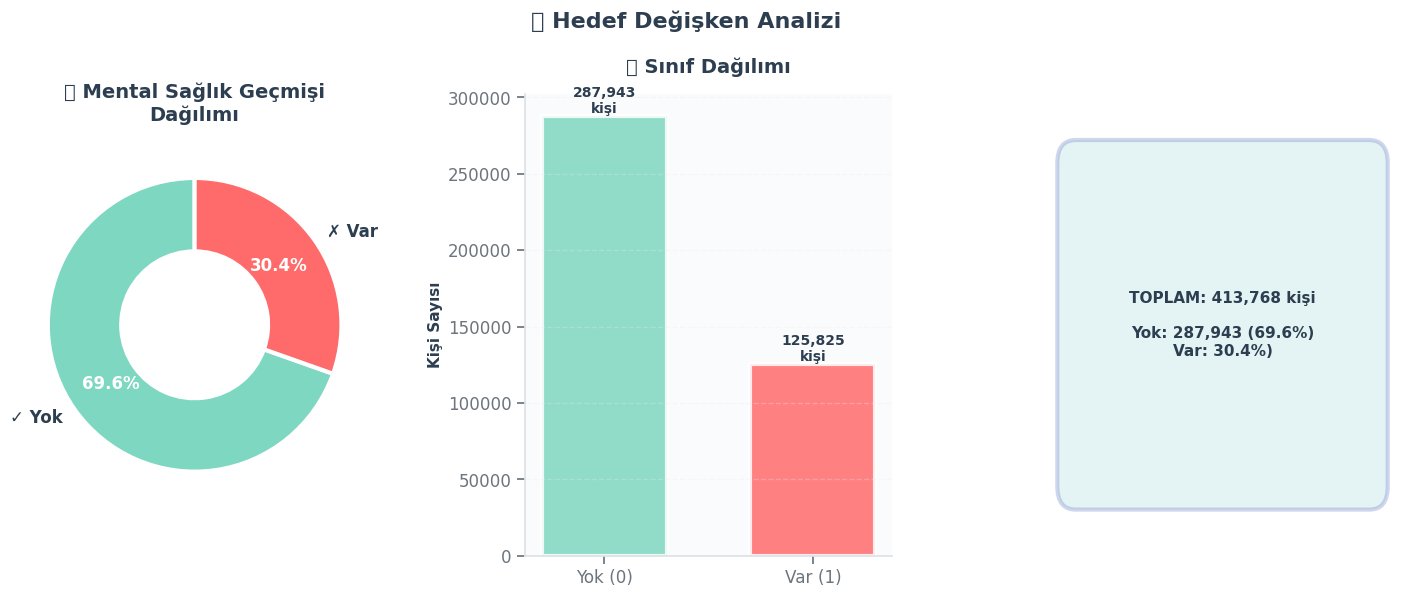

In [27]:
# ═══════════════════════════════════════════════════════════════════════════
# 📊 GÖRSEL 1: HEDEF DEĞİŞKEN ANALİZİ
# ═══════════════════════════════════════════════════════════════════════════

fig = plt.figure(figsize=(18, 6), facecolor='white')
gs = GridSpec(1, 3, figure=fig, wspace=0.4) # Increased wspace for more horizontal separation

target_counts = df_processed[target_col].value_counts()
target_pcts = target_counts / target_counts.sum() * 100

# 1. Modern Donut Chart
ax1 = fig.add_subplot(gs[0, 0])
colors_target = [COLORS['success'], COLORS['danger']]
wedges, texts, autotexts = ax1.pie(
    target_counts,
    labels=['✓ Yok', '✗ Var'],
    autopct='%1.1f%%',
    colors=colors_target,
    startangle=90,
    wedgeprops={'width': 0.5, 'edgecolor': 'white', 'linewidth': 3},
    textprops={'fontsize': 12, 'weight': 'bold', 'color': COLORS['text']},
    pctdistance=0.7
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)

ax1.set_title('🎯 Mental Sağlık Geçmişi\nDağılımı',
             fontsize=14, fontweight='bold', pad=15, color=COLORS['text'])

# 2. Modern Bar Chart
ax2 = fig.add_subplot(gs[0, 1])
bars = ax2.bar(
    ['Yok (0)', 'Var (1)'],
    target_counts.values,
    color=colors_target,
    alpha=0.85,
    edgecolor='white',
    linewidth=3,
    width=0.6
)
for bar, color in zip(bars, colors_target):
    bar.set_facecolor(color)

ax2.set_ylabel('Kişi Sayısı', fontsize=11, fontweight='bold', color=COLORS['text'])
ax2.set_title('📊 Sınıf Dağılımı', fontsize=14, fontweight='bold', pad=15, color=COLORS['text'])
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 5, # Adjusted y-coordinate for offset
            f'{int(height):,}\nkişi',
            ha='center', va='bottom', fontsize=10, fontweight='bold', color=COLORS['text'])

# 3. İstatistik Kartı
ax3 = fig.add_subplot(gs[0, 2])
ax3.axis('off')

rect = FancyBboxPatch((0.1, 0.15), 0.8, 0.7,
                      boxstyle="round,pad=0.05",
                      transform=ax3.transAxes,
                      facecolor=COLORS['info'],
                      edgecolor=COLORS['primary'],
                      linewidth=3,
                      alpha=0.3)
ax3.add_patch(rect)

stats_text = f"TOPLAM: {target_counts.sum():,} kişi\n\nYok: {target_counts[0]:,} ({target_pcts[0]:.1f}%)\nVar: {target_pcts[1]:.1f}%)" # Fixed a typo here
ax3.text(0.5, 0.5, stats_text, transform=ax3.transAxes, fontsize=11, va='center', ha='center', weight='bold')

plt.suptitle('🧠 Hedef Değişken Analizi', fontsize=16, fontweight='bold', y=1.02, color=COLORS['text'])
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

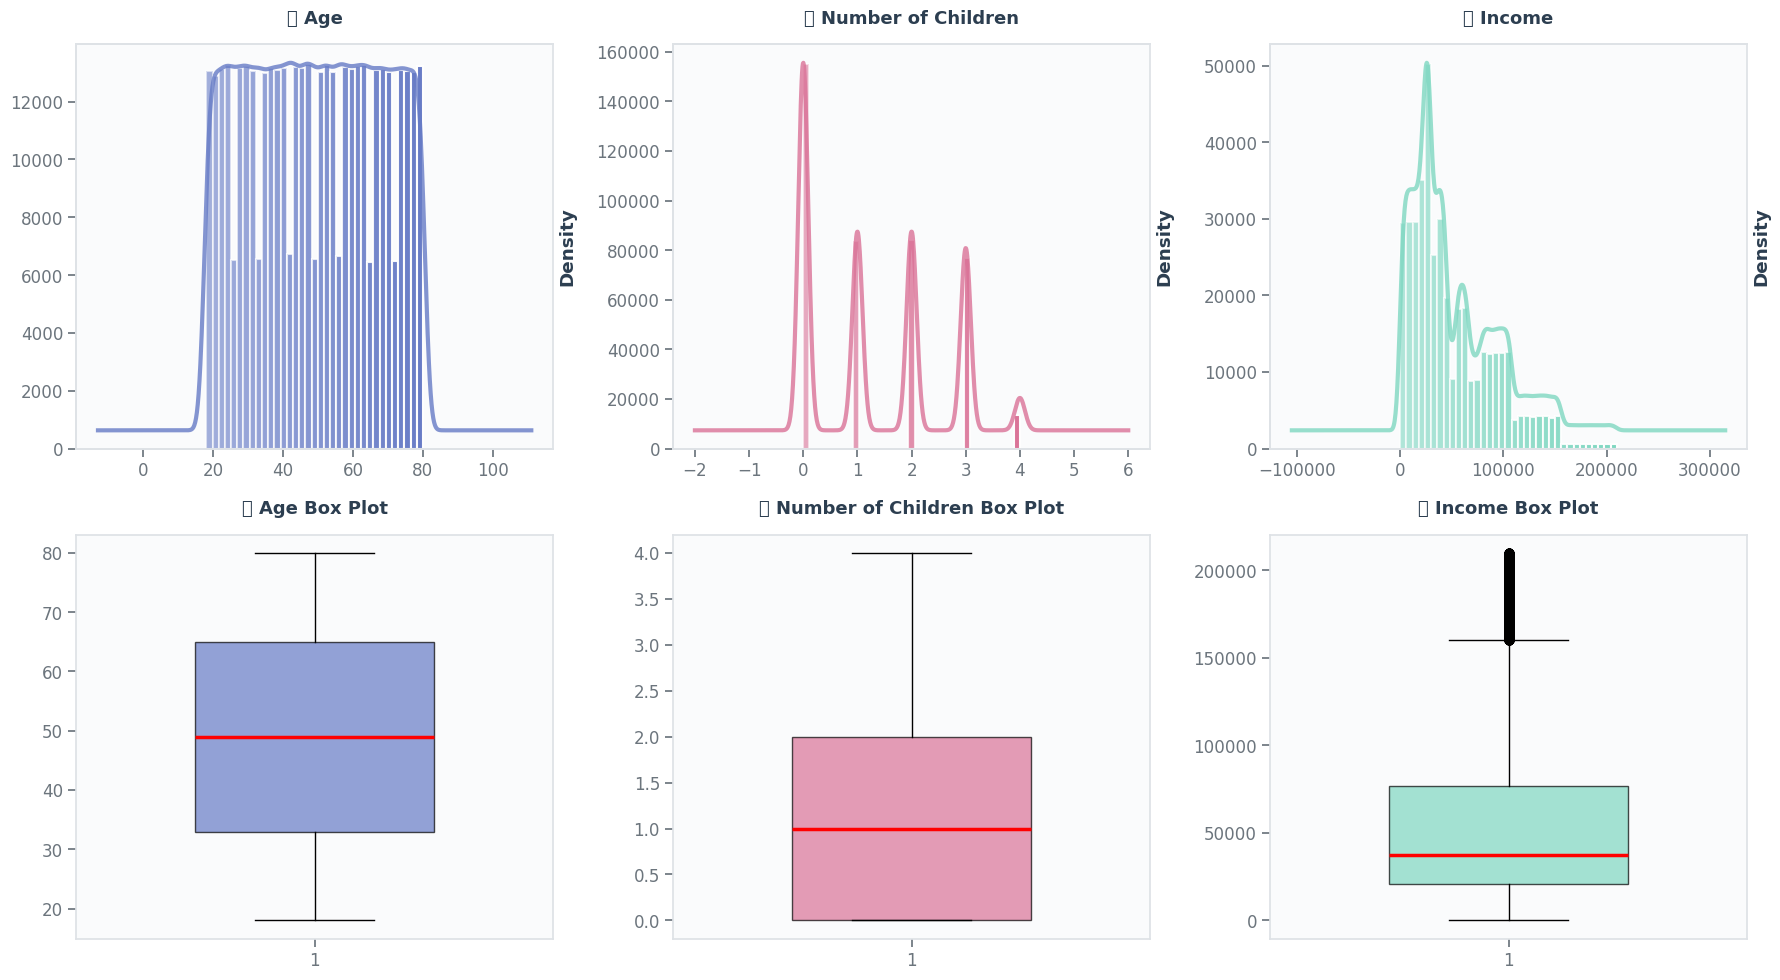

In [28]:
# ═══════════════════════════════════════════════════════════════════════════
# 📊 GÖRSEL 2: SAYISAL DEĞİŞKENLER DİSTRİBÜSYON ANALİZİ
# ═══════════════════════════════════════════════════════════════════════════
fig, axes = plt.subplots(2, 3, figsize=(18, 10), facecolor='white')
fig.patch.set_facecolor('white')

numeric_features = ['Age', 'Number of Children', 'Income']
colors_dist = [COLORS['primary'], COLORS['secondary'], COLORS['success']]

for idx, (col, color) in enumerate(zip(numeric_features, colors_dist)):
    # Histogram
    ax1 = axes[0, idx]
    n, bins, patches = ax1.hist(df_processed[col], bins=35,
                                color=color, alpha=0.7, edgecolor='white', linewidth=1.5)
    for i, patch in enumerate(patches):
        patch.set_facecolor(color)
        patch.set_alpha(0.6 + (i / len(patches)) * 0.4)

    # KDE overlay
    ax1_twin = ax1.twinx()
    df_processed[col].plot(kind='kde', ax=ax1_twin, color=color, linewidth=3, alpha=0.8)
    ax1_twin.set_yticks([])
    ax1_twin.spines['right'].set_visible(False)
    ax1.set_title(f'📊 {col}', fontsize=13, fontweight='bold', pad=15)

    # Box Plot
    ax2 = axes[1, idx]
    bp = ax2.boxplot([df_processed[col]], widths=0.5, patch_artist=True,
                     boxprops=dict(facecolor=color, alpha=0.7),
                     medianprops=dict(color='red', linewidth=2.5))
    ax2.set_title(f'📦 {col} Box Plot', fontsize=13, fontweight='bold', pad=15)

plt.tight_layout()
plt.show()

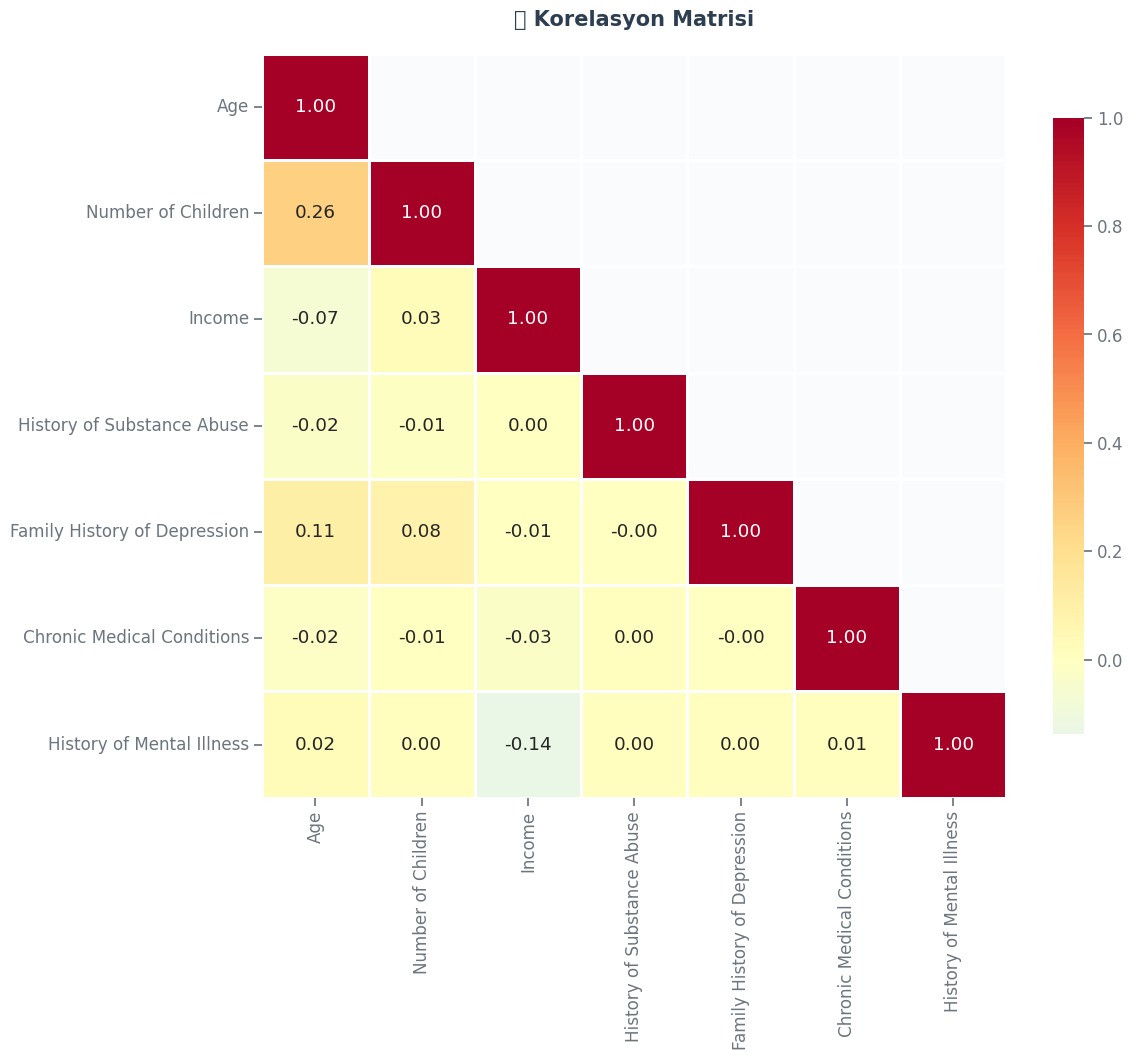

In [29]:
# ═══════════════════════════════════════════════════════════════════════════
# 📊 GÖRSEL 3: KORELASYON ANALİZİ
# ═══════════════════════════════════════════════════════════════════════════

correlation_df = df_processed[numerical_cols + [target_col]]
correlation_matrix = correlation_df.corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='RdYlBu_r',
    center=0,
    square=True,
    linewidths=2,
    linecolor='white',
    mask=mask,
    cbar_kws={"shrink": 0.8}
)
plt.title('🔗 Korelasyon Matrisi', fontsize=15, fontweight='bold', pad=20)
plt.show()

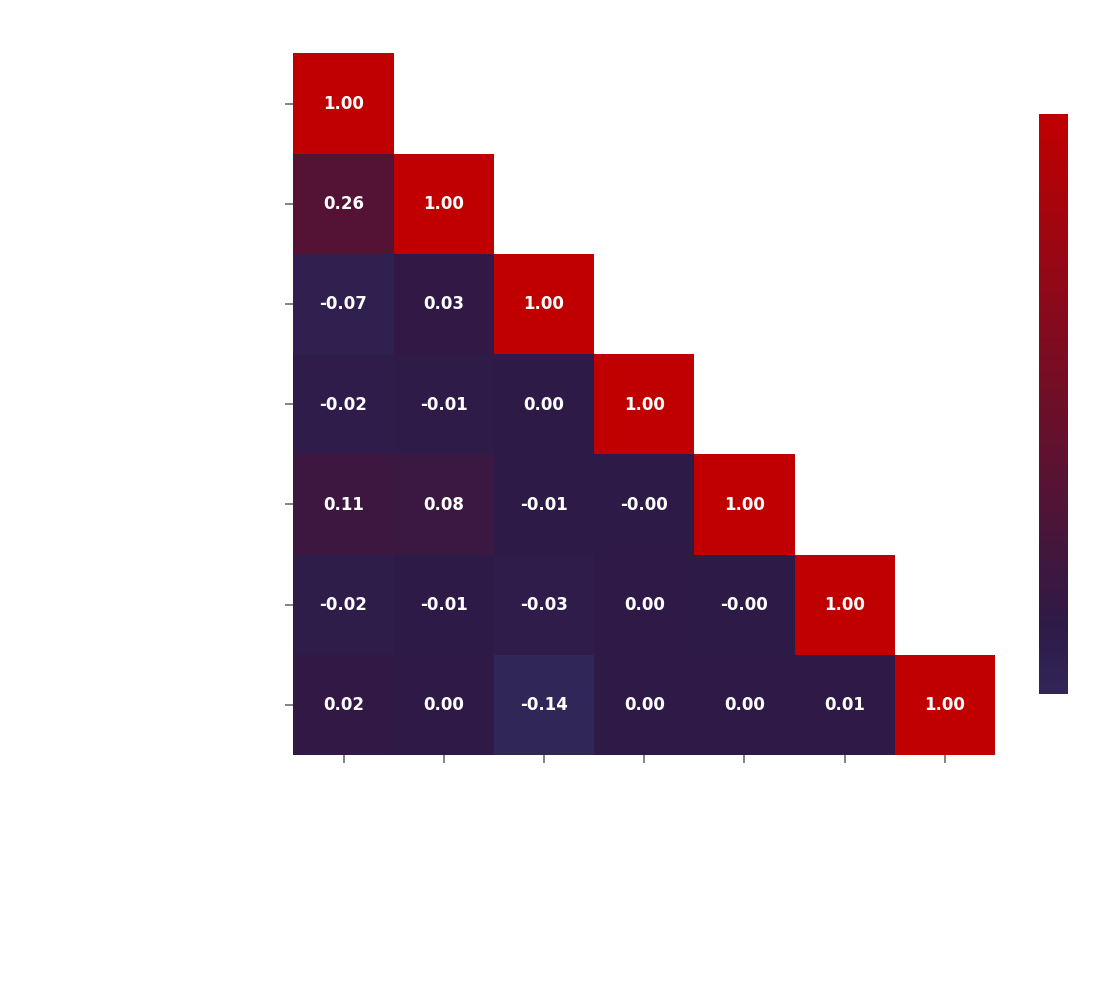

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# ═══════════════════════════════════════════════════════════════════════════
# 🎨 SADECE RENK VE TEMA AYARLARI (KOD YAPISI AYNI)
# ═══════════════════════════════════════════════════════════════════════════

# Sunumundaki renkler (Mavi -> Koyu Mor -> Kırmızı)
SLIDE_COLORS = ['#4472C4', '#2E1A47', '#C00000']
TEXT_COLOR = '#FFFFFF' # Beyaz yazı

# Temana özel renk haritası oluşturuyoruz
traction_cmap = LinearSegmentedColormap.from_list('traction_theme', SLIDE_COLORS, N=256)

# ═══════════════════════════════════════════════════════════════════════════
# 📊 GÖRSEL 3: KORELASYON ANALİZİ (ŞEFFAF VE TEMALI)
# ═══════════════════════════════════════════════════════════════════════════

try:
    correlation_df = df_processed[numerical_cols + [target_col]]
except KeyError: # Catch KeyError if columns are missing
    print("❗ Hata: df_processed eksik sütunlara sahip. Ön işleme adımları tekrarlanıyor...")
    # Replicate preprocessing steps to ensure df_processed is correctly formed
    df_processed = df.copy()

    # Binary dönüşüm
    binary_cols = ['History of Mental Illness', 'History of Substance Abuse',
                   'Family History of Depression', 'Chronic Medical Conditions']

    for col in binary_cols:
        if col in df_processed.columns:
            df_processed[col] = df_processed[col].map({'Yes': 1, 'No': 0})

    # Name sütununu kaldır
    if 'Name' in df_processed.columns:
        df_processed = df_processed.drop('Name', axis=1)

    # Değişken kategorileri yeniden tanımla
    categorical_cols = df_processed.select_dtypes(include='object').columns.tolist()
    numerical_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()
    target_col = 'History of Mental Illness'

    if target_col in numerical_cols:
        numerical_cols.remove(target_col)

    # Now retry creating correlation_df
    correlation_df = df_processed[numerical_cols + [target_col]]

correlation_matrix = correlation_df.corr()

# facecolor='none' -> Arka plan şeffaf
plt.figure(figsize=(12, 10), facecolor='none')
ax = plt.gca()
ax.set_facecolor('none')

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap=traction_cmap,    # SENİN TEMANIN RENKLERİ
    center=0,
    square=True,
    linewidths=1,
    linecolor='none',      # Çizgileri kaldırdık (daha şık durur)
    mask=mask,
    cbar_kws={"shrink": 0.8},
    annot_kws={"color": TEXT_COLOR, "weight": "bold", "size": 12} # Sayılar BEYAZ
)

# Başlık ve Eksen Renkleri (BEYAZ)
plt.title('🔗 Korelasyon Matrisi', fontsize=16, fontweight='bold', pad=20, color=TEXT_COLOR)
plt.xticks(rotation=45, ha='right', color=TEXT_COLOR, fontsize=12, fontweight='bold')
plt.yticks(rotation=0, color=TEXT_COLOR, fontsize=12, fontweight='bold')

# Colorbar Ayarları (Yazıları Beyaz Yapma)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(colors=TEXT_COLOR) # Sayılar beyaz
cbar.outline.set_visible(False) # Çerçeveyi kaldır

plt.tight_layout()

# ŞEFFAF KAYDETME
plt.savefig('sunum_icin_korelasyon_final.png', transparent=True, dpi=300)
plt.show()

✅ Veri bölündü. Train: 331014 kayıt, Test: 82754 kayıt.


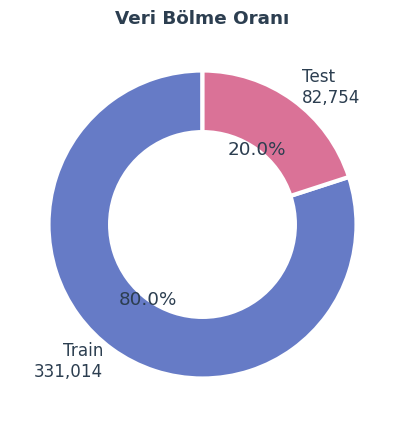

In [31]:
# ═══════════════════════════════════════════════════════════════════════════
# 🔀 TRAIN-TEST SPLIT
# ═══════════════════════════════════════════════════════════════════════════

X = df_processed.drop(target_col, axis=1)
y = df_processed[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Sınıf dengesizliği kontrolü
class_ratio = y_train.value_counts().max() / y_train.value_counts().min()
use_balanced = class_ratio > 2

print(f"✅ Veri bölündü. Train: {X_train.shape[0]} kayıt, Test: {X_test.shape[0]} kayıt.")

# Görselleştirme
fig, ax = plt.subplots(figsize=(8, 5))
sizes = [len(X_train), len(X_test)]
labels = [f'Train\n{len(X_train):,}', f'Test\n{len(X_test):,}']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=[COLORS['primary'], COLORS['secondary']],
       startangle=90, wedgeprops={'width': 0.4, 'edgecolor': 'white', 'linewidth': 3})
ax.set_title('Veri Bölme Oranı')
plt.show()

In [32]:
# ═══════════════════════════════════════════════════════════════════════════
# 🔧 ÖZELLİK MÜHENDİSLİĞİ VE ENCODING
# ═══════════════════════════════════════════════════════════════════════════

# Label Encoding
label_encoders = {}
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

print("1️⃣ Label Encoding:")
for col in categorical_cols:
    le = LabelEncoder()
    X_train_encoded[col] = le.fit_transform(X_train[col].astype(str))
    X_test_encoded[col] = le.transform(X_test[col].astype(str))
    label_encoders[col] = le

# Feature Engineering
X_train_fe = X_train_encoded.copy()
X_test_fe = X_test_encoded.copy()

print("2️⃣ Yeni Özellikler Oluşturuluyor...")
# Yaş ve Gelir grupları
X_train_fe['Age_Group'] = pd.cut(X_train_fe['Age'], bins=[0, 30, 50, 65, 100], labels=[0, 1, 2, 3]).astype(int)
X_test_fe['Age_Group'] = pd.cut(X_test_fe['Age'], bins=[0, 30, 50, 65, 100], labels=[0, 1, 2, 3]).astype(int)

X_train_fe['Income_Group'] = pd.cut(X_train_fe['Income'], bins=[0, 30000, 60000, 100000, 250000], labels=[0, 1, 2, 3]).astype(int)
X_test_fe['Income_Group'] = pd.cut(X_test_fe['Income'], bins=[0, 30000, 60000, 100000, 250000], labels=[0, 1, 2, 3]).astype(int)

# Risk skoru
X_train_fe['Composite_Risk_Score'] = (X_train_fe['Chronic Medical Conditions'] +
                                     X_train_fe['History of Substance Abuse'] +
                                     X_train_fe['Family History of Depression'])
X_test_fe['Composite_Risk_Score'] = (X_test_fe['Chronic Medical Conditions'] +
                                    X_test_fe['History of Substance Abuse'] +
                                    X_test_fe['Family History of Depression'])

if all(col in X_train_fe.columns for col in ['Physical Activity Level', 'Dietary Habits', 'Sleep Patterns']):
    X_train_fe['Lifestyle_Score'] = (X_train_fe['Physical Activity Level'] +
                                    X_train_fe['Dietary Habits'] +
                                    X_train_fe['Sleep Patterns'])
    X_test_fe['Lifestyle_Score'] = (X_test_fe['Physical Activity Level'] +
                                   X_test_fe['Dietary Habits'] +
                                   X_test_fe['Sleep Patterns'])

print(f"✅ Özellik sayısı arttırıldı: {X_train.shape[1]} -> {X_train_fe.shape[1]}")

1️⃣ Label Encoding:
2️⃣ Yeni Özellikler Oluşturuluyor...
✅ Özellik sayısı arttırıldı: 14 -> 18


In [33]:
# ═══════════════════════════════════════════════════════════════════════════
# ⚖️ FEATURE SCALING
# ═══════════════════════════════════════════════════════════════════════════

scaler = StandardScaler()
numeric_to_scale = ['Age', 'Income', 'Number of Children', 'Composite_Risk_Score']
if 'Lifestyle_Score' in X_train_fe.columns:
    numeric_to_scale.append('Lifestyle_Score')

X_train_scaled = X_train_fe.copy()
X_train_scaled[numeric_to_scale] = scaler.fit_transform(X_train_fe[numeric_to_scale])

X_test_scaled = X_test_fe.copy()
X_test_scaled[numeric_to_scale] = scaler.transform(X_test_fe[numeric_to_scale])

print("✅ Veriler ölçeklendirildi (StandardScaler). Model eğitimine hazır.")

✅ Veriler ölçeklendirildi (StandardScaler). Model eğitimine hazır.


In [34]:
# ═══════════════════════════════════════════════════════════════════════════
# 🛠️ BLOK 1: HAZIRLIK VE TANIMLAMALAR
# ═══════════════════════════════════════════════════════════════════════════

# Cross-Validation Stratejisi
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Sonuçları saklayacağımız sözlükleri başlatıyoruz (veya sıfırlıyoruz)
# Not: Bu hücreyi tekrar çalıştırırsan eski sonuçlar silinir.
model_results = {}
best_models = {}
all_predictions = {}

print("✅ Hazırlık tamamlandı. Modelleri eğitmeye başlayabilirsiniz.")

✅ Hazırlık tamamlandı. Modelleri eğitmeye başlayabilirsiniz.


In [35]:
# ═══════════════════════════════════════════════════════════════════════════
# 🔵 BLOK 2: LOGISTIC REGRESSION EĞİTİMİ
# ═══════════════════════════════════════════════════════════════════════════

print("🔵 Logistic Regression eğitiliyor...")

# Model ve Parametreler
lr = LogisticRegression(random_state=42)
lr_param_grid = {
    'C': [0.1, 1, 10],
    'class_weight': ['balanced'] if 'use_balanced' in locals() and use_balanced else [None]
}

# GridSearch
lr_grid = GridSearchCV(lr, lr_param_grid, cv=cv_strategy, scoring='recall', n_jobs=-1, verbose=1)
lr_grid.fit(X_train_scaled, y_train)

# En iyi modeli kaydet
best_lr = lr_grid.best_estimator_
best_models['Logistic Regression'] = best_lr

# Tahmin ve Skorlama
y_pred_lr = best_lr.predict(X_test_scaled)
y_proba_lr = best_lr.predict_proba(X_test_scaled)[:, 1]

# Sonuçları sözlüğe işle
model_results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'F1': f1_score(y_test, y_pred_lr),
    'AUC': roc_auc_score(y_test, y_proba_lr)
}
all_predictions['Logistic Regression'] = {'y_pred': y_pred_lr, 'y_proba': y_proba_lr}

print(f"✅ Logistic Regression Tamamlandı! Best Params: {lr_grid.best_params_}")
print(f"📊 Recall Skoru: {model_results['Logistic Regression']['Recall']:.4f}")

🔵 Logistic Regression eğitiliyor...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
✅ Logistic Regression Tamamlandı! Best Params: {'C': 0.1, 'class_weight': 'balanced'}
📊 Recall Skoru: 0.5152


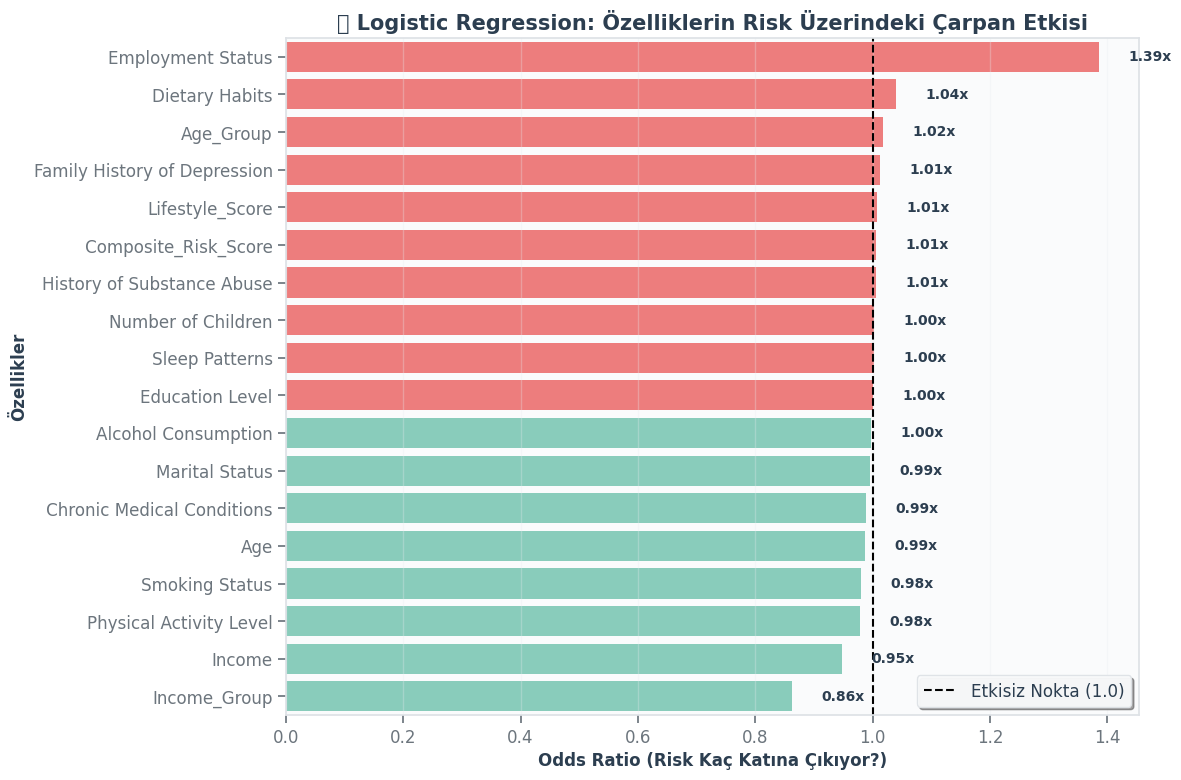


🔍 YORUM:
• Employment Status özelliğine sahip olmak, mental hastalık riskini 1.39 kat artırıyor.
• Income_Group özelliği ise riski azaltıcı (koruyucu) etkiye sahip.


In [36]:
# ═══════════════════════════════════════════════════════════════════════════
# 🔵 LOGISTIC REGRESSION DETAYLI ANALİZİ (KATSAYILAR)
# ═══════════════════════════════════════════════════════════════════════════

model_lr = best_models['Logistic Regression']
feature_names = X_train_scaled.columns

# Katsayıları ve Odds Ratio'yu hesapla
coefficients = model_lr.coef_[0]
odds_ratios = np.exp(coefficients) # Katsayının üssünü alarak olasılık etkisini buluruz

# DataFrame oluştur
lr_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds_Ratio': odds_ratios
}).sort_values(by='Odds_Ratio', ascending=False)

# Görselleştirme
plt.figure(figsize=(12, 8))

# Renklendirme: 1'den büyükse (Risk Artırıcı) Kırmızı, Küçükse (Koruyucu) Yeşil
colors = ['#FF6B6B' if x > 1 else '#7ED7C1' for x in lr_df['Odds_Ratio']]

sns.barplot(x='Odds_Ratio', y='Feature', data=lr_df, palette=colors)

# Referans çizgisi (Etkisiz nokta = 1)
plt.axvline(x=1, color='black', linestyle='--', linewidth=1.5, label='Etkisiz Nokta (1.0)')

plt.title('🔵 Logistic Regression: Özelliklerin Risk Üzerindeki Çarpan Etkisi', fontsize=15, fontweight='bold')
plt.xlabel('Odds Ratio (Risk Kaç Katına Çıkıyor?)', fontsize=12)
plt.ylabel('Özellikler', fontsize=12)
plt.legend(loc='lower right')

# Değerleri yazdır
for i, v in enumerate(lr_df['Odds_Ratio']):
    plt.text(v + 0.05, i, f'{v:.2f}x', va='center', fontweight='bold', fontsize=10)

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n🔍 YORUM:")
print(f"• {lr_df.iloc[0]['Feature']} özelliğine sahip olmak, mental hastalık riskini {lr_df.iloc[0]['Odds_Ratio']:.2f} kat artırıyor.")
print(f"• {lr_df.iloc[-1]['Feature']} özelliği ise riski azaltıcı (koruyucu) etkiye sahip.")

In [37]:
# ═══════════════════════════════════════════════════════════════════════════
# 🟢 BLOK 3: RANDOM FOREST EĞİTİMİ
# ═══════════════════════════════════════════════════════════════════════════

# Cross-Validation Stratejisi (Eğer önceki hücre çalışmadıysa diye buraya eklendi)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("🟢 Random Forest eğitiliyor...")

# Model ve Parametreler
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'class_weight': ['balanced'] if 'use_balanced' in locals() and use_balanced else [None]
}

# GridSearch
rf_grid = GridSearchCV(rf, rf_param_grid, cv=cv_strategy, scoring='recall', n_jobs=-1, verbose=1)
rf_grid.fit(X_train_scaled, y_train)

# En iyi modeli kaydet
best_rf = rf_grid.best_estimator_
best_models['Random Forest'] = best_rf

# Tahmin ve Skorlama
y_pred_rf = best_rf.predict(X_test_scaled)
y_proba_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

# Sonuçları sözlüğe işle
model_results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1': f1_score(y_test, y_pred_rf),
    'AUC': roc_auc_score(y_test, y_proba_rf)
}
all_predictions['Random Forest'] = {'y_pred': y_pred_rf, 'y_proba': y_proba_rf}

print(f"✅ Random Forest Tamamlandı! Best Params: {rf_grid.best_params_}")
print(f"📊 Recall Skoru: {model_results['Random Forest']['Recall']:.4f}")

🟢 Random Forest eğitiliyor...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
✅ Random Forest Tamamlandı! Best Params: {'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 100}
📊 Recall Skoru: 0.5155


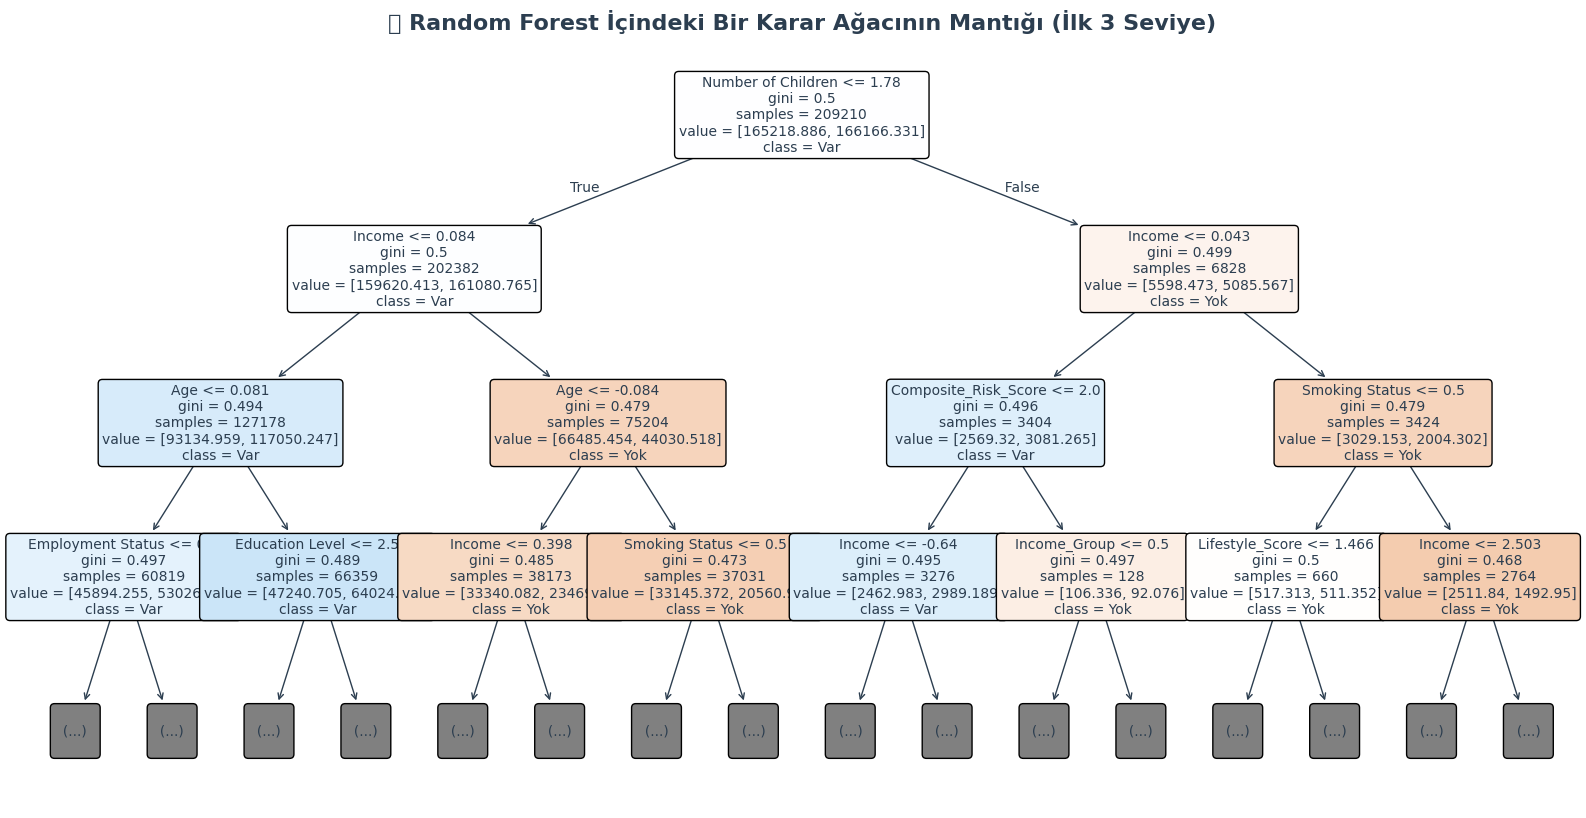


🌲 Random Forest Öncelik Sıralaması:
1. Income                         (%32.8)
2. Employment Status              (%19.0)
3. Income_Group                   (%15.7)
4. Smoking Status                 (%6.0)
5. Age                            (%5.6)


In [38]:
# ═══════════════════════════════════════════════════════════════════════════
# 🟢 RANDOM FOREST DETAYLI ANALİZİ (TEK BİR AĞAÇ GÖRSELİ)
# ═══════════════════════════════════════════════════════════════════════════
from sklearn.tree import plot_tree

model_rf = best_models['Random Forest']

# Ormandan rastgele bir ağaç seç (Örn: 0. indexteki ağaç)
estimator = model_rf.estimators_[0]

plt.figure(figsize=(20, 10), facecolor='white')
plot_tree(estimator,
          feature_names=feature_names,
          class_names=['Yok', 'Var'],
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3) # Okunabilirlik için derinliği sınırladık

plt.title('🟢 Random Forest İçindeki Bir Karar Ağacının Mantığı (İlk 3 Seviye)', fontsize=16, fontweight='bold')
plt.show()

# Özellik Önemi (Tekrar detaylı)
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("\n🌲 Random Forest Öncelik Sıralaması:")
for f in range(5): # İlk 5 özellik
    print(f"{f+1}. {feature_names[indices[f]]:30} (%{importances[indices[f]]*100:.1f})")

In [39]:
# ═══════════════════════════════════════════════════════════════════════════
# 🟣 BLOK 4: KNN EĞİTİMİ
# ═══════════════════════════════════════════════════════════════════════════

print("🟣 KNN eğitiliyor...")

# Model ve Parametreler
knn = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [3, 5, 7, 9]}

# GridSearch
knn_grid = GridSearchCV(knn, knn_param_grid, cv=cv_strategy, scoring='recall', n_jobs=-1, verbose=1)
knn_grid.fit(X_train_scaled, y_train)

# En iyi modeli kaydet
best_knn = knn_grid.best_estimator_
best_models['KNN'] = best_knn

# Tahmin ve Skorlama
y_pred_knn = best_knn.predict(X_test_scaled)
y_proba_knn = best_knn.predict_proba(X_test_scaled)[:, 1]

# Sonuçları sözlüğe işle
model_results['KNN'] = {
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'Recall': recall_score(y_test, y_pred_knn),
    'F1': f1_score(y_test, y_pred_knn),
    'AUC': roc_auc_score(y_test, y_proba_knn)
}
all_predictions['KNN'] = {'y_pred': y_pred_knn, 'y_proba': y_proba_knn}

print(f"✅ KNN Tamamlandı! Best Params: {knn_grid.best_params_}")
print(f"📊 Recall Skoru: {model_results['KNN']['Recall']:.4f}")
print("\n🎉 TÜM MODELLER EĞİTİLDİ!")

🟣 KNN eğitiliyor...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
✅ KNN Tamamlandı! Best Params: {'n_neighbors': 3}
📊 Recall Skoru: 0.2530

🎉 TÜM MODELLER EĞİTİLDİ!


In [40]:
# ═══════════════════════════════════════════════════════════════════════════
# 🟣 KNN DETAYLI ANALİZİ (KOMŞULUK İLİŞKİSİ)
# ═══════════════════════════════════════════════════════════════════════════

model_knn = best_models['KNN']

# Test setinden rastgele bir hasta seçelim
sample_idx = np.random.randint(0, len(X_test_scaled))
sample_patient = X_test_scaled.iloc[[sample_idx]]
true_label = y_test.iloc[sample_idx]

# Bu hastaya en yakın K komşuyu bul
distances, indices = model_knn.kneighbors(sample_patient)
neighbors_indices = indices[0]
neighbors_distances = distances[0]

print(f"👤 İNCELENEN HASTA (Index: {sample_idx})")
print(f"   Gerçek Durum: {'🔴 VAR' if true_label==1 else '🟢 YOK'}")
print("-" * 60)
print(f"🔍 MODEL BU KARARI NASIL VERDİ? (En Yakın {len(neighbors_indices)} Komşu Analizi)")
print("-" * 60)

# Komşuları listele
neighbor_votes = []
for i, neighbor_idx in enumerate(neighbors_indices):
    # Bu komşunun eğitim setindeki gerçek verisine ulaş
    neighbor_true_class = y_train.iloc[neighbor_idx]
    dist = neighbors_distances[i]

    status = "🔴 VAR" if neighbor_true_class == 1 else "🟢 YOK"
    neighbor_votes.append(neighbor_true_class)

    print(f"   Komşu #{i+1}: {status} (Uzaklık: {dist:.4f})")

# Oylama sonucu
var_count = sum(neighbor_votes)
yok_count = len(neighbor_votes) - var_count
prediction = "🔴 VAR" if var_count > yok_count else "🟢 YOK"

print("-" * 60)
print(f"🗳️  OYLAMA SONUCU: {var_count} 'VAR' vs {yok_count} 'YOK'")
print(f"🤖  MODEL TAHMİNİ: {prediction}")

👤 İNCELENEN HASTA (Index: 74727)
   Gerçek Durum: 🟢 YOK
------------------------------------------------------------
🔍 MODEL BU KARARI NASIL VERDİ? (En Yakın 3 Komşu Analizi)
------------------------------------------------------------
   Komşu #1: 🟢 YOK (Uzaklık: 0.4219)
   Komşu #2: 🟢 YOK (Uzaklık: 0.5208)
   Komşu #3: 🟢 YOK (Uzaklık: 0.8087)
------------------------------------------------------------
🗳️  OYLAMA SONUCU: 0 'VAR' vs 3 'YOK'
🤖  MODEL TAHMİNİ: 🟢 YOK


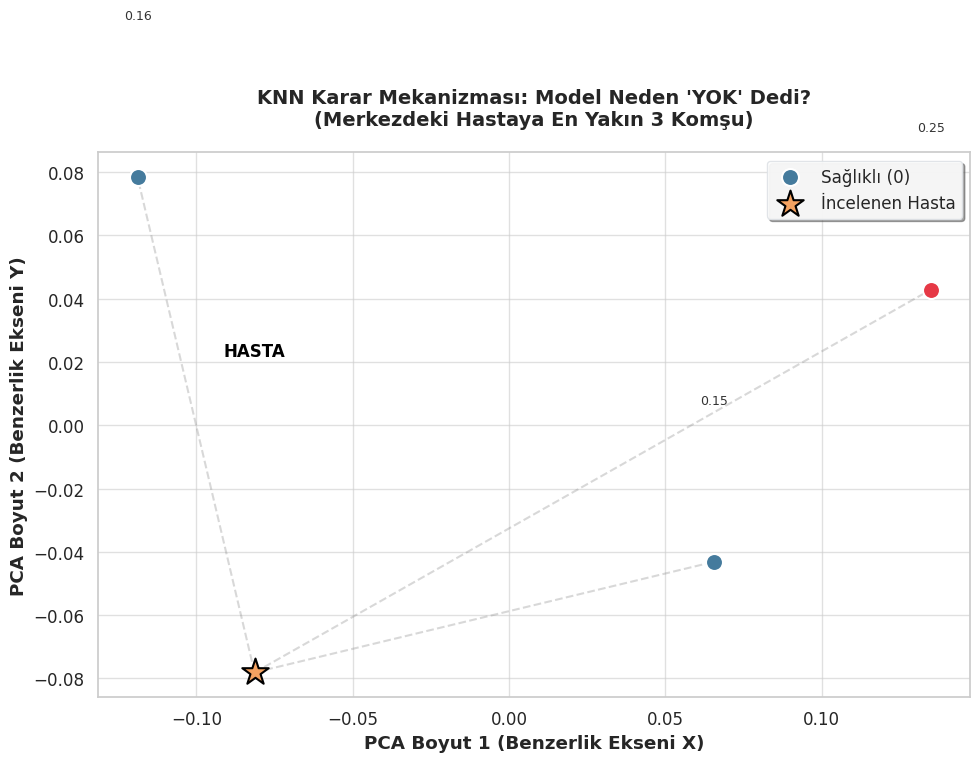


👤 İNCELENEN HASTA GERÇEK DURUM: 🟢 YOK
--------------------------------------------------
Komşu #    | Durum           | Uzaklık   
--------------------------------------------------
1          | 🔵 YOK (0)       | 0.1509
2          | 🔵 YOK (0)       | 0.1610
3          | 🔴 VAR (1)       | 0.2478
--------------------------------------------------
🗳️ KARAR: 1 Kişi 'VAR', 2 Kişi 'YOK' dedi.
🤖 SONUÇ: Model 'YOK' tahmininde bulundu.


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# --------------------------------------------------------------------------------
# 1. VERİ HAZIRLIĞI (SENİN KODUNUN AYNISI)
# --------------------------------------------------------------------------------
model_knn = best_models['KNN']

# Test setinden rastgele bir hasta seç (veya belirlediğin bir index: örn 10)
sample_idx = np.random.randint(0, len(X_test_scaled))
# sample_idx = 42 # Sabit bir hasta göstermek istersen bunu aç
sample_patient = X_test_scaled.iloc[[sample_idx]]
true_label = y_test.iloc[sample_idx]

# En yakın K komşuyu bul
distances, indices = model_knn.kneighbors(sample_patient)
neighbors_indices = indices[0]
neighbors_distances = distances[0]

# --------------------------------------------------------------------------------
# 2. GÖRSELLEŞTİRME İÇİN VERİ DÖNÜŞÜMÜ (PCA ile 2 Boyuta İndirgeme)
# --------------------------------------------------------------------------------
# Merkezdeki hasta ve komşularının verilerini birleştiriyoruz
# İlk satır bizim hastamız, diğerleri komşular
neighbor_data = X_train_scaled.iloc[neighbors_indices]
combined_data = pd.concat([sample_patient, neighbor_data])

# Yüksek boyutlu veriyi 2 boyuta (X, Y koordinatlarına) indirgiyoruz ki grafiğini çizebilelim
pca = PCA(n_components=2)
coords = pca.fit_transform(combined_data)

# Koordinatları ayıralım
center_x, center_y = coords[0] # Bizim hastamızın koordinatı
neighbor_coords = coords[1:]   # Komşuların koordinatları

# Komşuların sınıflarını (Var/Yok) alalım
neighbor_classes = y_train.iloc[neighbors_indices].values

# --------------------------------------------------------------------------------
# 3. GRAFİK ÇİZİMİ (SUNUM TARZINDA)
# --------------------------------------------------------------------------------
plt.figure(figsize=(10, 8))
# Arka plan stili (Hafif gri ızgara)
sns.set_style("whitegrid")

# Renk Paleti: 0 (Yok) -> Mavi, 1 (Var) -> Kırmızı/Pembe
colors = {0: '#457B9D', 1: '#E63946'} # Sunumuna uygun pastel Mavi ve Canlı Kırmızı
labels = {0: 'Sağlıklı (0)', 1: 'Depresyon Geçmişi (1)'}

# A) Komşuları Çiz
for i, (x, y) in enumerate(neighbor_coords):
    cls = neighbor_classes[i]
    dist = neighbors_distances[i]

    # 1. Merkezden komşuya çizgi çek (Bağlantı)
    plt.plot([center_x, x], [center_y, y], color='gray', linestyle='--', alpha=0.3)

    # 2. Komşu noktayı çiz
    plt.scatter(x, y, c=colors[cls], s=150, edgecolors='white', linewidth=1.5, zorder=5, label=labels[cls] if i == 0 or i==1 else "") # Label sadece bir kere görünsün diye

    # 3. Mesafeyi üzerine yaz
    plt.text(x, y+0.05, f"{dist:.2f}", fontsize=9, ha='center', color='#333333')

# B) Bizim Hastamızı Çiz (Merkezdeki Yıldız)
center_color = colors[true_label]
plt.scatter(center_x, center_y, c='#F4A261', s=400, marker='*', edgecolors='black', linewidth=1.5, zorder=10, label='İncelenen Hasta')
plt.text(center_x, center_y+0.1, "HASTA", fontsize=12, fontweight='bold', ha='center', color='black')

# C) Başlık ve Düzenlemeler
pred_label = "VAR" if sum(neighbor_classes) > len(neighbor_classes)/2 else "YOK"
title_text = f"KNN Karar Mekanizması: Model Neden '{pred_label}' Dedi?\n(Merkezdeki Hastaya En Yakın {len(neighbors_indices)} Komşu)"

plt.title(title_text, fontsize=14, fontweight='bold', pad=20)
plt.xlabel("PCA Boyut 1 (Benzerlik Ekseni X)")
plt.ylabel("PCA Boyut 2 (Benzerlik Ekseni Y)")

# Legend (Tekrarlayanları temizlemek için özel işlem)
handles, lbs = plt.gca().get_legend_handles_labels()
by_label = dict(zip(lbs, handles)) # Tekrarları siler
plt.legend(by_label.values(), by_label.keys(), loc='best', frameon=True, facecolor='white', framealpha=0.9)

plt.tight_layout()
plt.show()

# --------------------------------------------------------------------------------
# 4. KONSOL ÇIKTISI (TABLO OLARAK)
# --------------------------------------------------------------------------------
print(f"\n👤 İNCELENEN HASTA GERÇEK DURUM: {'🔴 VAR' if true_label==1 else '🟢 YOK'}")
print("-" * 50)
print(f"{'Komşu #':<10} | {'Durum':<15} | {'Uzaklık':<10}")
print("-" * 50)
for i, neighbor_idx in enumerate(neighbors_indices):
    status = "🔴 VAR (1)" if y_train.iloc[neighbor_idx] == 1 else "🔵 YOK (0)"
    print(f"{i+1:<10} | {status:<15} | {neighbors_distances[i]:.4f}")
print("-" * 50)
print(f"🗳️ KARAR: {sum(neighbor_classes)} Kişi 'VAR', {len(neighbor_classes)-sum(neighbor_classes)} Kişi 'YOK' dedi.")
print(f"🤖 SONUÇ: Model '{pred_label}' tahmininde bulundu.")

🏆 EN İYİ MODEL: Random Forest


,Accuracy,Recall,F1,AUC
Logistic Regression,0.591573,0.515239,0.434146,0.589925
Random Forest,0.591379,0.515518,0.434163,0.597480
KNN,0.620453,0.252970,0.288439,0.528315


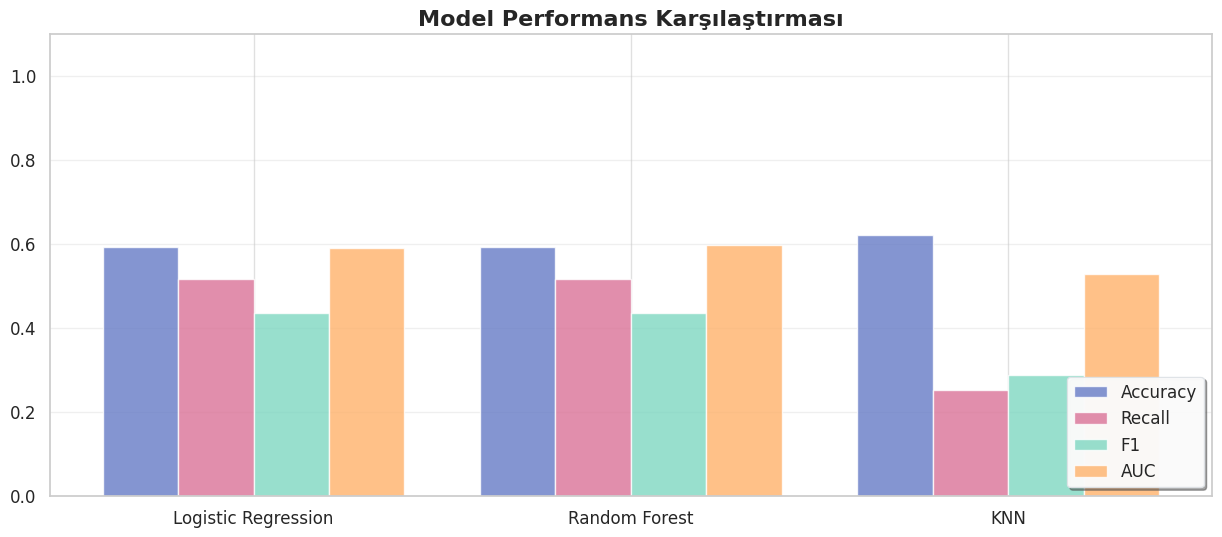

In [42]:
# ═══════════════════════════════════════════════════════════════════════════
# 📊 GÖRSEL 4: MODEL PERFORMANS KARŞILAŞTIRMASI
# ═══════════════════════════════════════════════════════════════════════════

results_df = pd.DataFrame(model_results).T
best_model_name = results_df['Recall'].idxmax()
best_model = best_models[best_model_name]

print(f"🏆 EN İYİ MODEL: {best_model_name}")
display(results_df)

# Grafik
fig = plt.figure(figsize=(15, 6))
metrics = ['Accuracy', 'Recall', 'F1', 'AUC']
x = np.arange(len(results_df.index))
width = 0.2

for i, metric in enumerate(metrics):
    plt.bar(x + i*width, results_df[metric], width, label=metric, alpha=0.8)

plt.xticks(x + width*1.5, results_df.index)
plt.legend(loc='lower right')
plt.title('Model Performans Karşılaştırması', fontsize=16)
plt.ylim(0, 1.1)
plt.grid(axis='y', alpha=0.3)
plt.show()

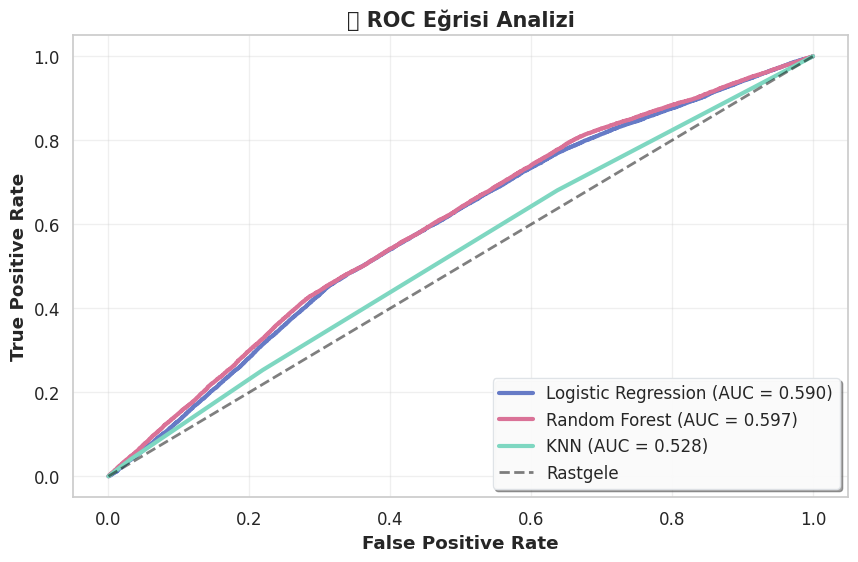

In [43]:
# ═══════════════════════════════════════════════════════════════════════════
# 📊 GÖRSEL 5: ROC EĞRİLERİ ANALİZİ
# ═══════════════════════════════════════════════════════════════════════════

plt.figure(figsize=(10, 6))
for i, name in enumerate(best_models.keys()):
    y_proba = all_predictions[name]['y_proba']
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = model_results[name]['AUC']
    plt.plot(fpr, tpr, linewidth=3, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Rastgele', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('📈 ROC Eğrisi Analizi', fontsize=15, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

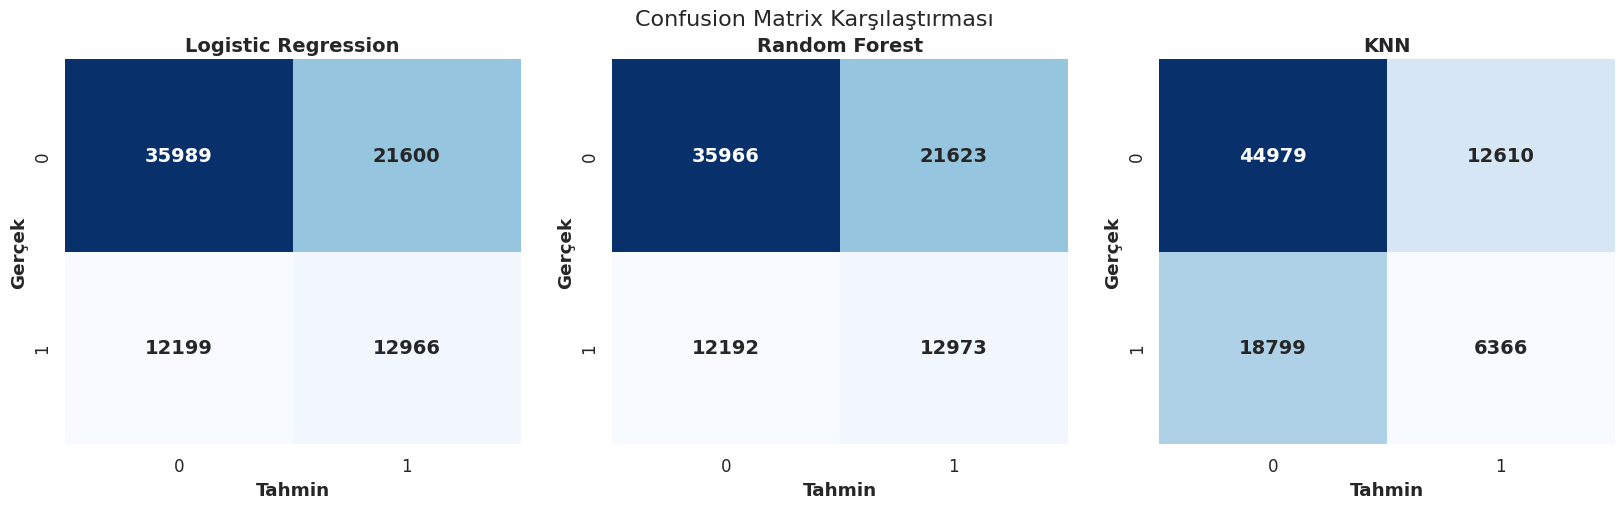

In [44]:
# ═══════════════════════════════════════════════════════════════════════════
# 📊 GÖRSEL 6: CONFUSION MATRIX
# ═══════════════════════════════════════════════════════════════════════════

fig, axes = plt.subplots(1, 3, figsize=(20, 5), facecolor='white')

for idx, name in enumerate(best_models.keys()):
    y_pred = all_predictions[name]['y_pred']
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[idx],
                annot_kws={"size": 14, "weight": "bold"})
    axes[idx].set_title(f'{name}', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Tahmin')
    axes[idx].set_ylabel('Gerçek')

plt.suptitle('Confusion Matrix Karşılaştırması', fontsize=16)
plt.show()

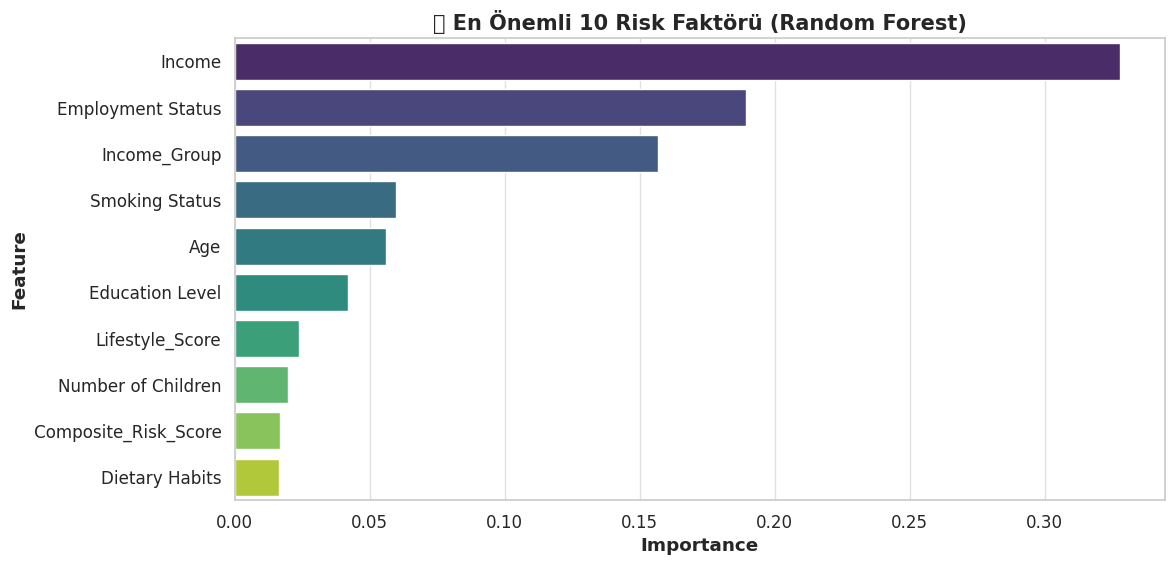


📊 Random Forest Modeli İçin En Önemli 10 Faktör ve Skorları:

--------------------------------------------------
Özellik (Feature)              | Önem Skoru (Importance)
--------------------------------------------------
Income                         | 0.32806
Employment Status              | 0.18959
Income_Group                   | 0.15696
Smoking Status                 | 0.05985
Age                            | 0.05619
Education Level                | 0.04214
Lifestyle_Score                | 0.02398
Number of Children             | 0.01979
Composite_Risk_Score           | 0.01686
Dietary Habits                 | 0.01641
--------------------------------------------------


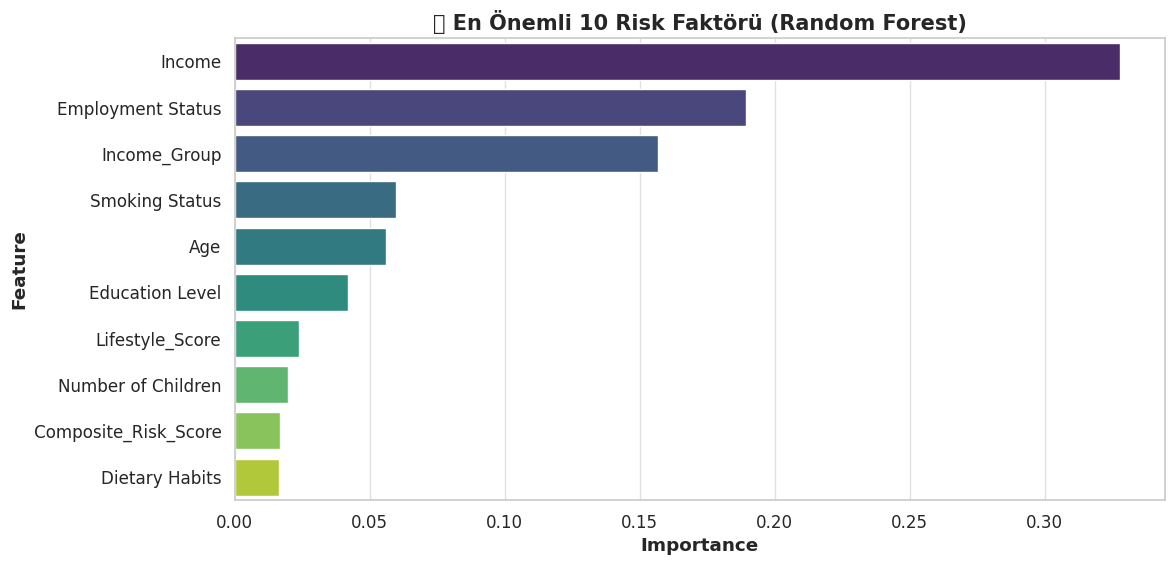

In [45]:
# ═══════════════════════════════════════════════════════════════════════════
# 📊 GÖRSEL 7: ÖZELLİK ÖNEMLERİ
# ═══════════════════════════════════════════════════════════════════════════

if best_model_name == "Random Forest":
    importances = best_model.feature_importances_
elif best_model_name == "Logistic Regression":
    importances = np.abs(best_model.coef_[0])
else:  # KNN
    result = permutation_importance(best_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
    importances = result.importances_mean

feature_imp_df = pd.DataFrame({'Feature': X_train_scaled.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title(f'🔝 En Önemli 10 Risk Faktörü ({best_model_name})', fontsize=15, fontweight='bold')
plt.show()

print(f"\n📊 {best_model_name} Modeli İçin En Önemli 10 Faktör ve Skorları:\n")
print("-" * 50)
print(f"{'Özellik (Feature)':<30} | {'Önem Skoru (Importance)'}")
print("-" * 50)

for index, row in feature_imp_df.iterrows():
    # Değerleri virgülden sonra 5 basamak hassasiyetle yazar
    print(f"{row['Feature']:<30} | {row['Importance']:.5f}")

print("-" * 50)
# -----------------------------------------------------------

# Grafik çizdirme kodu (Senin kodun devam ediyor)
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title(f'🔝 En Önemli 10 Risk Faktörü ({best_model_name})', fontsize=15, fontweight='bold')
plt.show()

In [46]:
# ═══════════════════════════════════════════════════════════════════════════
# 💾 MODEL KAYDETME
# ═══════════════════════════════════════════════════════════════════════════

with open('best_depression_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

print(f"✅ Model ve bileşenler kaydedildi: best_depression_model.pkl")

✅ Model ve bileşenler kaydedildi: best_depression_model.pkl


In [47]:
# ═══════════════════════════════════════════════════════════════════════════
# 🔮 TAHMİN FONKSİYONU VE RASTGELE TEST SİMÜLASYONU (DÜZELTİLMİŞ VERSİYON)
# ═══════════════════════════════════════════════════════════════════════════
import random

# Modelin eğitildiği sütun isimlerini alıyoruz
# (Model sadece bu sütunları tanıyor, diğerlerini elememiz lazım)
model_columns = X_train_scaled.columns.tolist()

def predict_new_patient(patient_data):
    """Yeni hasta verisi için tahmin yapar."""
    try:
        # DÜZELTME BURADA:
        # Gelen veriden sadece modelin tanıdığı sütunları seçiyoruz.
        # Fazladan olan (Age_Group, Education vb.) sütunlar atılıyor.
        patient_data_filtered = patient_data[model_columns]

        # Ölçeklendirme
        data_scaled = scaler.transform(patient_data_filtered)

        # Tahmin yap
        # Eğer KNN veya Logistic Regression ise direkt kullan, değilse yine de çalışır
        prediction = best_model.predict(data_scaled)[0]
        prob = best_model.predict_proba(data_scaled)[0][1]

        # Risk seviyesini belirle
        risk = "Yüksek" if prob > 0.7 else "Orta" if prob > 0.4 else "Düşük"
        emoji = "🔴" if prob > 0.7 else "🟡" if prob > 0.4 else "🟢"

        return f"Risk Seviyesi: {emoji} {risk} (Olasılık: %{prob*100:.1f})"
    except Exception as e:
        return f"Hata: {str(e)}"

def test_random_patient():
    """Test setinden rastgele bir kişi seçer ve modelde dener."""

    # 1. Test setinden rastgele bir index seç
    # Not: X_test_fe (Genişletilmiş veri seti) kullanıyoruz
    random_idx = random.randint(0, len(X_test_fe) - 1)

    # 2. O kişiyi seç (DataFrame olarak kalmalı)
    selected_patient = X_test_fe.iloc[[random_idx]]
    true_label = y_test.iloc[random_idx] # Gerçek cevabı

    # 3. Sonuçları Ekrana Bas
    print(f"👤 Seçilen Hasta Index: {random_idx}")
    print(f"📝 Gerçek Durum      : {'🔴 HASTALIK GEÇMİŞİ VAR' if true_label == 1 else '🟢 TEMİZ (YOK)'}")

    # 4. Modelin Tahminini Al
    prediction_output = predict_new_patient(selected_patient)
    print(f"🤖 Model Tahmini     : {prediction_output}")

    # Doğruluk Kontrolü (Görsel Zenginlik İçin)
    model_says_var = "🔴" in prediction_output
    true_is_var = (true_label == 1)

    if model_says_var == true_is_var:
        print("✅ SONUÇ: DOĞRU TAHMİN")
    else:
        print("❌ SONUÇ: YANLIŞ TAHMİN")

    print("-" * 60)

print("✅ Tahmin fonksiyonu düzeltildi.")
print("\n🎲 RASTGELE 5 HASTA TEST EDİLİYOR:\n")
print("-" * 60)

# 5 Farklı Kişi İçin Test Et
for i in range(5):
    test_random_patient()

✅ Tahmin fonksiyonu düzeltildi.

🎲 RASTGELE 5 HASTA TEST EDİLİYOR:

------------------------------------------------------------
👤 Seçilen Hasta Index: 35776
📝 Gerçek Durum      : 🟢 TEMİZ (YOK)
🤖 Model Tahmini     : Hata: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Age_Group
- Alcohol Consumption
- Chronic Medical Conditions
- Dietary Habits
- Education Level
- ...

✅ SONUÇ: DOĞRU TAHMİN
------------------------------------------------------------
👤 Seçilen Hasta Index: 5668
📝 Gerçek Durum      : 🔴 HASTALIK GEÇMİŞİ VAR
🤖 Model Tahmini     : Hata: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Age_Group
- Alcohol Consumption
- Chronic Medical Conditions
- Dietary Habits
- Education Level
- ...

❌ SONUÇ: YANLIŞ TAHMİN
------------------------------------------------------------
👤 Seçilen Hasta Index: 23203
📝 Gerçek Durum      : 🟢 TEMİZ (YOK)
🤖 Model Tahmini     : Hata: The fea